# Modules

In [1]:
# Importation des modules
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from Splitters.RandomSplitter import RandomSplitter
from Splitters.StratifiedSplitter import StratifiedSplitter
from Splitters.SystematicSplitter import SystematicSplitter
from Splitters.KMeanSplitter import KMeanSplitter
from Splitters.SPlitSplitter import SPlitSplitter
from Splitters.KennardStoneSplitter import KennardStoneSplitter
from Splitters.SpxySplitter import SpxySplitter

# Fonctions

In [2]:
def plot_nd_data(data: pd.DataFrame, indexes_train: List[int], indexes_test: List[int], title: str = "Scatter Plot Data") -> None:
    """
    Affiche les données d'un DataFrame dans un espace 2D (réduit par PCA) et colore les points en fonction de deux listes d'index.

    Args:
    - data (pd.DataFrame): Le DataFrame contenant les données à afficher.
    - indexes_train (List[int]): Liste d'index pour les points d'entraînement.
    - indexes_test (List[int]): Liste d'index pour les points de test.
    - title (str): Titre du graphique (défaut = 'Scatter Plot Data').

    Returns:
    - None
    """
    # Réduction de dimension à 2 avec la PCA
    pca = PCA(n_components=2)
    reduced_data = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2"])

    # Extraction des données pour les points d'entraînement et de test
    train_data = reduced_data.loc[indexes_train]
    test_data = reduced_data.loc[indexes_test]

    # Initialisation de la figure
    plt.figure(figsize=(13, 8.66))

    # Scatterplot des points d'entraînement en cyan et des points de test en rouge
    plt.scatter(train_data["PC1"], train_data["PC2"], color="cyan", label="Train Data", edgecolors="black")
    plt.scatter(test_data["PC1"], test_data["PC2"], color="red", label="Test Data", edgecolors="black")

    # Ajout de légendes et de titres
    plt.legend(loc="upper center")
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    # Affichage du graphique
    plt.show()

# Variables globales

In [3]:
# Chargement du dataset Iris
IRIS = load_iris()

# Création et affichage d'un DataFrame pandas avec les données
DATA = pd.DataFrame(data=IRIS.data, columns=IRIS.feature_names).assign(target=IRIS.target)
display(DATA.head())

# Définition de certaines constantes et paramètres
TEST_SIZE: float = 0.50  # Taille de l'ensemble de test lors de la division des données
LABELS: List[str] = ["petal length (cm)"]  # Liste des colonnes utilisées comme étiquettes
COLUMN: str = "petal length (cm)"  # Colonne spécifique utilisée pour certaines opérations
METRIC: str = "euclidean"  # Métrique utilisée dans certaines opérations
ACP: int = 3  # Nombre de composantes principales à extraire lors de l'ACP
CLASSIFICATION: bool = False  # Indicateur de classification ou régression
N_GROUPS: int = 3  # Nombre de groupes à créer dans certaines opérations
RANDOM_STATE: int = 42 # Graine aléatoire pour la reproductibilité des résultats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitters

In [4]:
# Liste des noms de splitters
names = [
    "RandomSplitter",
    "StratifiedSplitter",
    "SystematicSplitter",
    "KMeanSplitter",
    "SPlitSplitter",
    "KennardStoneSplitter",
    "SpxySplitter",
]

# Liste des classes de splitters correspondantes
splitter_objs = [
    RandomSplitter,
    StratifiedSplitter,
    SystematicSplitter,
    KMeanSplitter,
    SPlitSplitter,
    KennardStoneSplitter,
    SpxySplitter
]

# Liste des paramètres pour chaque splitter
params = [
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "random_state": RANDOM_STATE},
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "strat_column": COLUMN, "classification": CLASSIFICATION, "n_strats": N_GROUPS},
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "sorting_column" : COLUMN, "rotations": RANDOM_STATE},
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "n_clusters": N_GROUPS, "pca" : ACP, "metric": METRIC, "random_state": RANDOM_STATE},
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "start": RANDOM_STATE},
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "pca" : ACP, "metric": METRIC, "random_state": RANDOM_STATE},
    {"data": DATA, "labels": LABELS, "test_size": TEST_SIZE, "pca" : ACP, "metric": METRIC, "random_state": RANDOM_STATE}
]

# Création d'un dictionnaire de splitters avec les noms comme clés
splitters = {name : splitter(**param) for name, splitter, param in zip(names, splitter_objs, params)}

# Test des splitters


RandomSplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,3.441333,4.074667,-0.633333
std,1.752226,1.732370,0.019856
min,1.100000,1.000000,0.100000
25%,1.500000,1.650000,-0.150000
50%,4.000000,4.700000,-0.700000
75%,4.750000,5.350000,-0.600000
max,6.700000,6.900000,-0.200000


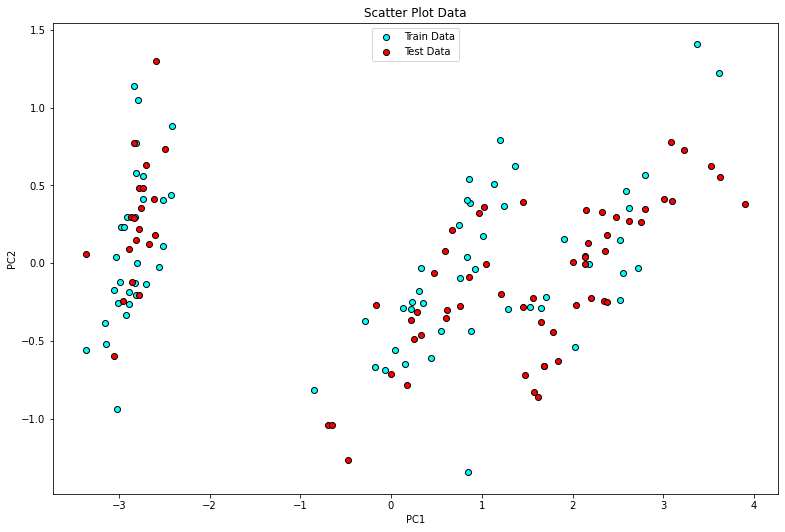


StratifiedSplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,3.754667,3.761333,-0.006667
std,1.750081,1.792167,-0.042087
min,1.000000,1.100000,-0.100000
25%,1.600000,1.500000,0.100000
50%,4.300000,4.400000,-0.100000
75%,5.100000,5.100000,0.000000
max,6.700000,6.900000,-0.200000


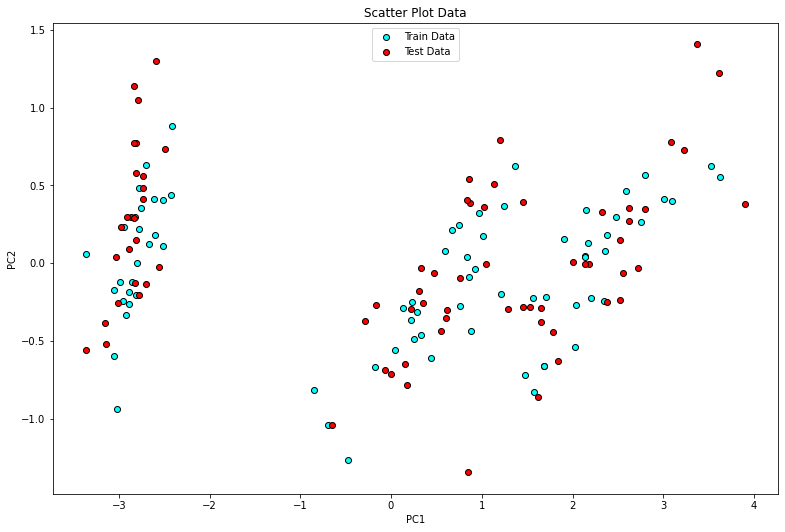


SystematicSplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,3.776000,3.740000,0.036000
std,1.777627,1.764668,0.012958
min,1.100000,1.000000,0.100000
25%,1.600000,1.550000,0.050000
50%,4.400000,4.300000,0.100000
75%,5.100000,5.100000,0.000000
max,6.900000,6.700000,0.200000


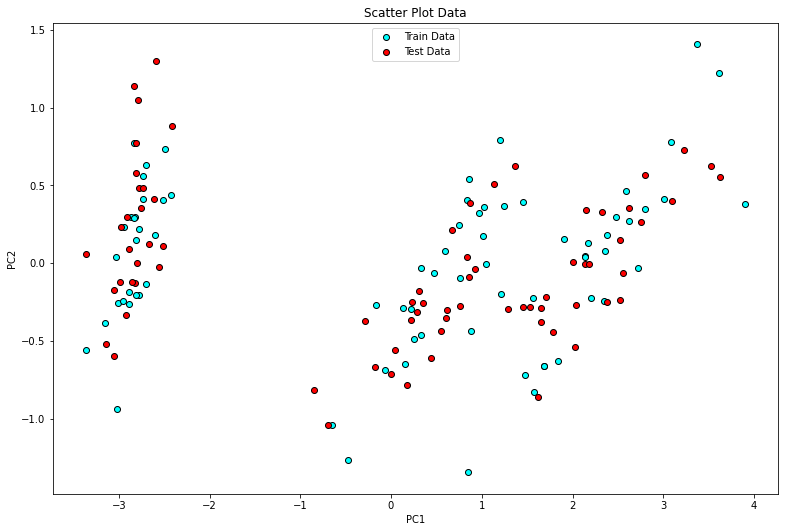


KMeanSplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,3.728000,3.788000,-0.060000
std,1.814771,1.726108,0.088663
min,1.000000,1.200000,-0.200000
25%,1.550000,1.600000,-0.050000
50%,4.400000,4.300000,0.100000
75%,5.000000,5.350000,-0.350000
max,6.900000,6.000000,0.900000


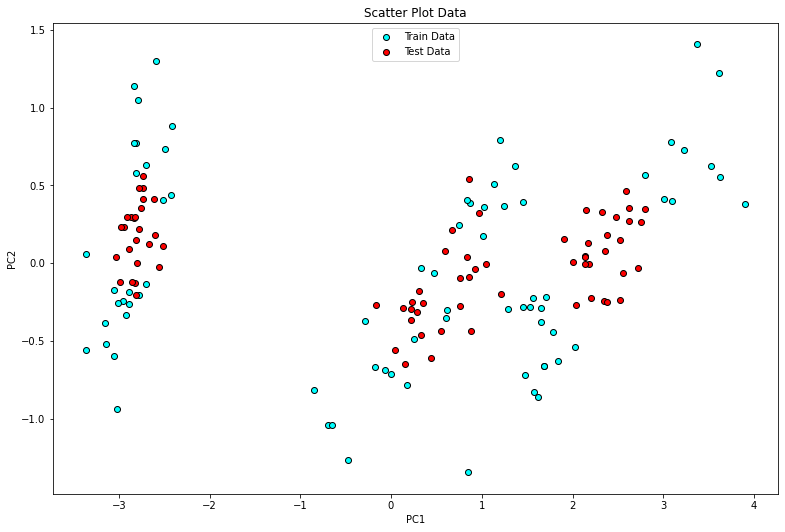


SPlitSplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,3.762667,3.753333,0.009333
std,1.776785,1.765689,0.011096
min,1.100000,1.000000,0.100000
25%,1.600000,1.500000,0.100000
50%,4.300000,4.400000,-0.100000
75%,5.050000,5.100000,-0.050000
max,6.900000,6.600000,0.300000


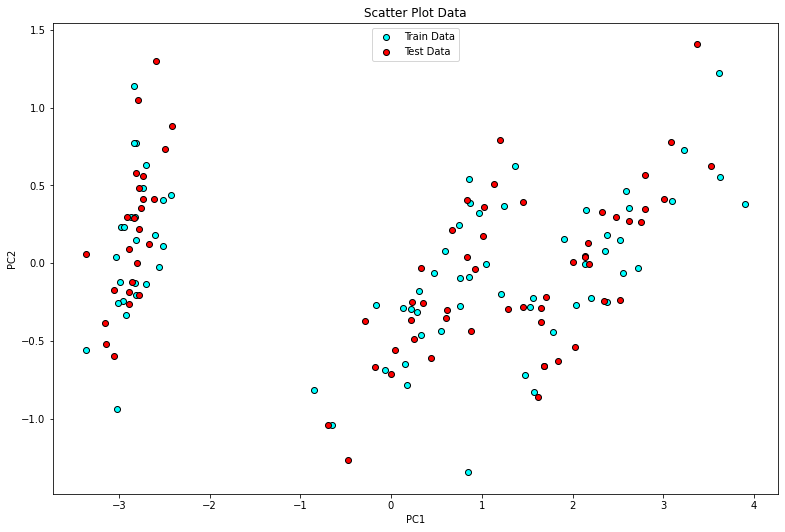


KennardStoneSplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,3.981333,3.534667,0.446667
std,1.728669,1.784732,-0.056063
min,1.000000,1.300000,-0.300000
25%,1.800000,1.500000,0.300000
50%,4.500000,4.200000,0.300000
75%,5.100000,5.100000,0.000000
max,6.900000,6.700000,0.200000


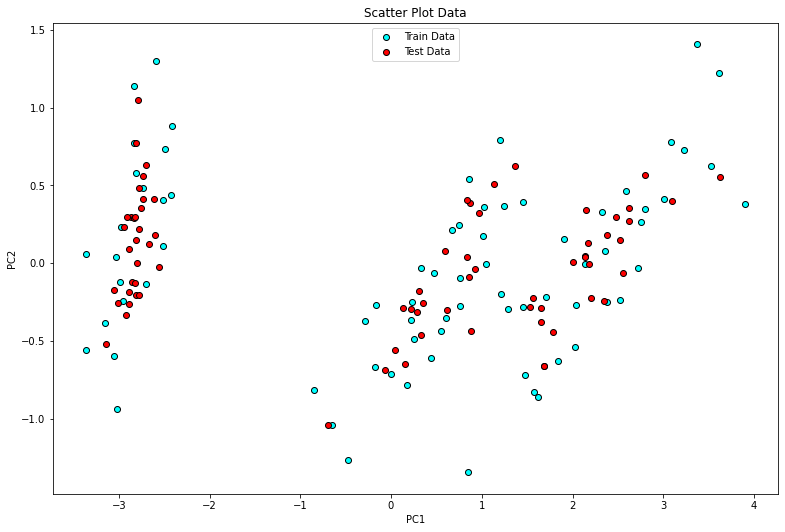


SpxySplitter :


,Train,Test,Δ delta
count,75.000000,75.000000,0.000000
mean,4.149333,3.366667,0.782667
std,1.690864,1.762165,-0.071301
min,1.000000,1.300000,-0.300000
25%,3.400000,1.500000,1.900000
50%,4.600000,4.000000,0.600000
75%,5.300000,4.900000,0.400000
max,6.900000,6.700000,0.200000


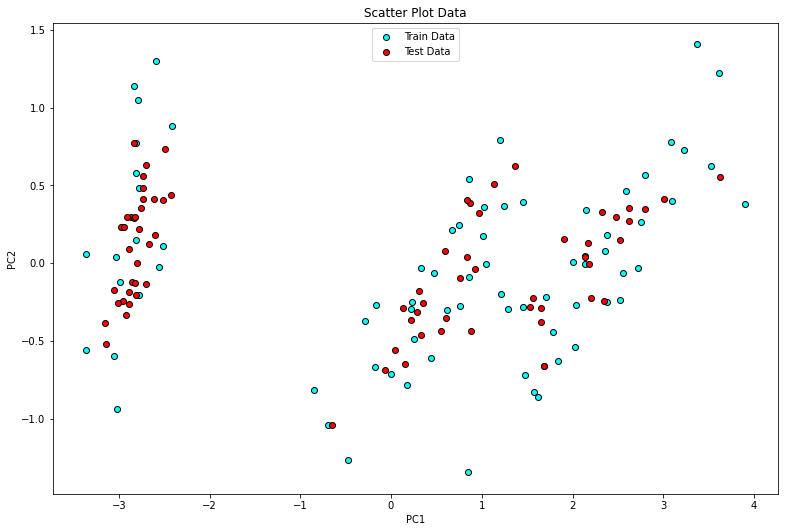

In [5]:
# Itération de chaque splitter
for name_splitter, splitter in splitters.items():
    # Affichage du nom du splitter
    print(f"\n{name_splitter} :")
    
    # Division des données en ensembles d'entraînement et de test
    x_train, x_test, y_train, y_test = splitter.train_test_split()
    
    # Création d'un tableau de comparaison statistique entre les ensembles d'entraînement et de test
    comparaison_tab = pd.concat(objs=[y_train.describe(), y_test.describe()], axis=1)
    comparaison_tab.columns = ["Train", "Test"]
    comparaison_tab["Δ delta"] = comparaison_tab["Train"] - comparaison_tab["Test"]
    
    # Affichage du tableau de comparaison
    display(comparaison_tab)

    # Tracé des données dans un espace 2D avec coloration des points d'entraînement et de test
    plot_nd_data(data=DATA, indexes_train=splitter.train_split, indexes_test=splitter.test_split)